# Feature Engineering 

Feature Engineering is the process of transforming raw data into meaningful features that can be used as input for advanceced visualisations or machine learning algorithms.

It involves selecting, creating, and transforming features to hopefully enhance the dataset.

Poorly designed features can lead to a disruptive dataset. 


## Types of Feature Engineering

* **Handling Missing Values**

    Filling missing values with appropriate strategies, e.g., mean, median, or constant values.

* **Encoding Categorical Variables**

    Converting categorical data into numeric form, such as one-hot encoding or label encoding. Only needed if you are building a model

* **Binning Numeric Variables**

    Grouping continuous data into bins or categories to simplify the representation.

* **Feature Scaling**

    Scaling features to bring them to a similar range, e.g., Min-Max scaling or Standard scaling.

* **Creating New Features**

    Generating new features by combining or transforming existing ones.

* **Handling Outliers**

    Managing extreme values that can affect model performance.

* **Feature Joining**

    Creating new features by combining multiple existing features.

## Imports and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [208]:
%pip install --upgrade --user pycaret

  Using cached pycaret-3.3.0-py3-none-any.whl.metadata (17 kB)
  Using cached scikit_learn-1.4.1.post1-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached imbalanced_learn-0.12.0-py3-none-any.whl.metadata (8.2 kB)
  Using cached plotly-5.20.0-py3-none-any.whl.metadata (7.0 kB)
  Using cached sktime-0.27.1-py3-none-any.whl.metadata (30 kB)
   ---------------------------------------- 0.0/485.9 kB ? eta -:--:--
   --- ----------------------------------- 41.0/485.9 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------  481.3/485.9 kB 5.1 MB/s eta 0:00:01
   ---------------------------------------- 485.9/485.9 kB 5.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/257.7 kB ? eta -:--:--
   ---------------------------------------- 257.7/257.7 kB 8.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/15.7 MB ? eta -:--:--
   ---------------------------------------- 0.2/15.7 MB 11.5 MB/s eta 0:00:02
   - --------------------------------------

In [218]:
#from dataprep.eda import create_report
from pycaret.datasets import get_data
from pycaret.datasets import get_data
from pycaret.classification import *
from pandas_profiling import ProfileReport
from IPython.display import IFrame

In [199]:
%pip install --upgrade --user pandas dask lightgbm

Note: you may need to restart the kernel to use updated packages.


In [102]:
%pip install pandas scikit-learn imbalanced-learn

In [72]:
df = pd.read_csv("C:/Users/bertie/OneDrive - RFI Holdings/Desktop/EXPLORE AI/INTEGRATED PROJECT/github/Integrated-Project/datasets/insurance_claims_clean.csv")

In [73]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


### Missing Values

In [74]:
null_counts = df.isnull().sum()
null_counts

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [75]:
df['authorities_contacted'] = df['authorities_contacted'].fillna('None')

In [76]:
null_counts = df.isnull().sum()
null_counts

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [77]:
#df_new = df.drop("_c39", axis = 1)

### Binding Numeric Data

In [78]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.961000,546238.648000,1134.000000,1257.106556,1.103000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.126378,257063.005276,610.669237,243.913987,2.296446e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,0.000000e+00,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1090.567500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1258.425000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


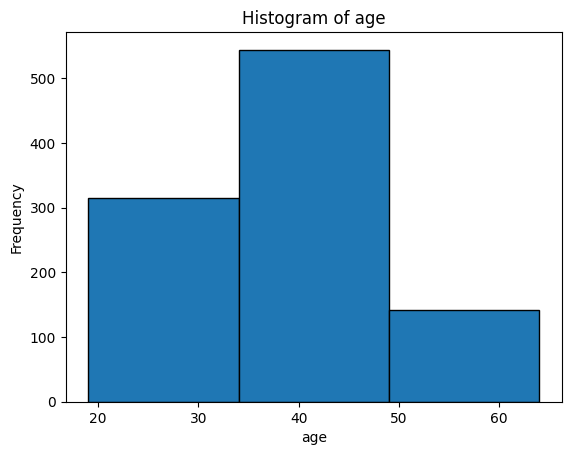

In [79]:
# Choose the column for the histogram
column_name = 'age'

# Plot the histogram
plt.hist(df[column_name], bins=3, edgecolor='black')

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_name}')

# Display the histogram
plt.show()

In [80]:
bin_edges = [0, 30, 55, 100]  # Define the bin edges
bin_labels = ['Young Adult', 'Middle Aged', 'Elderly']  
# Corresponding labels for each bin

# Create a new column based on the bin labels
df['ages_category'] = pd.cut(df['age'], 
                    bins=bin_edges, labels=bin_labels)

In [81]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,Middle Aged
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,Middle Aged
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,Young Adult
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,Middle Aged
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,Middle Aged


In [82]:
bin_edges_customer = [-1, 25, 150, 500]  # Define the bin edges
bin_labels_customer = ['New Client', 'Established Client', 'Long-Term Client']  
# Corresponding labels for each bin

# Create a new column based on the bin labels
df['customer_category'] = pd.cut(df['months_as_customer'], 
                        bins=bin_edges_customer, labels=bin_labels_customer)

In [83]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,71610,6510,13020,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,5070,780,780,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,34650,7700,3850,23100,Dodge,RAM,2007,N,Young Adult,Established Client
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,6500,1300,650,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client


In [84]:
null_counts = df.isnull().sum()
null_counts

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

## Creating New Features

In [85]:
df["Contract Years"] = df["months_as_customer"]/12

In [86]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,Contract Years
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,6510,13020,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client,27.333333
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,780,780,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client,19.000000
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,7700,3850,23100,Dodge,RAM,2007,N,Young Adult,Established Client,11.166667
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,6340,6340,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client,21.333333
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1300,650,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client,19.000000


## Feature Joining

In [87]:
df['total_premiums_paid'] = (df['policy_annual_premium']/12) * df['months_as_customer']

In [88]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,Contract Years,total_premiums_paid
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,13020,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client,27.333333,38455.540000
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,780,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client,19.000000,22747.180000
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3850,23100,Dodge,RAM,2007,N,Young Adult,Established Client,11.166667,15780.063333
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,6340,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client,21.333333,30202.453333
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,650,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client,19.000000,30094.290000


In [89]:
df['net_value_of_customer'] = df['total_premiums_paid'] - df['total_claim_amount']

In [90]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,Contract Years,total_premiums_paid,net_value_of_customer
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client,27.333333,38455.540000,-33154.460000
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client,19.000000,22747.180000,17677.180000
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,23100,Dodge,RAM,2007,N,Young Adult,Established Client,11.166667,15780.063333,-18869.936667
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client,21.333333,30202.453333,-33197.546667
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client,19.000000,30094.290000,23594.290000


In [91]:
df.dtypes

months_as_customer                int64
age                               int64
policy_number                     int64
policy_bind_date                 object
policy_state                     object
policy_csl                       object
policy_deductable                 int64
policy_annual_premium           float64
umbrella_limit                    int64
insured_zip                       int64
insured_sex                      object
insured_education_level          object
insured_occupation               object
insured_hobbies                  object
insured_relationship             object
capital-gains                     int64
capital-loss                      int64
incident_date                    object
incident_type                    object
collision_type                   object
incident_severity                object
authorities_contacted            object
incident_state                   object
incident_city                    object
incident_location                object


In [92]:
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['incident_date'] = pd.to_datetime(df['incident_date'])

In [93]:
df.policy_bind_date

0     2014-10-17
1     2006-06-27
2     2000-09-06
3     1990-05-25
4     2014-06-06
         ...    
995   1991-07-16
996   2014-01-05
997   2003-02-17
998   2011-11-18
999   1996-11-11
Name: policy_bind_date, Length: 1000, dtype: datetime64[ns]

In [94]:
df['Policy_Start_Day'] = df['policy_bind_date'].dt.day
df['Policy_Start_Month'] = df['policy_bind_date'].dt.month
df['Policy_Start_Year'] = df['policy_bind_date'].dt.year

df['Incident_Day'] = df['incident_date'].dt.day
df['Incident_Month'] = df['incident_date'].dt.month
df['Incident_Year'] = df['incident_date'].dt.year

In [95]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,customer_category,Contract Years,total_premiums_paid,net_value_of_customer,Policy_Start_Day,Policy_Start_Month,Policy_Start_Year,Incident_Day,Incident_Month,Incident_Year
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,Long-Term Client,27.333333,38455.540000,-33154.460000,17,10,2014,25,1,2015
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,Long-Term Client,19.000000,22747.180000,17677.180000,27,6,2006,21,1,2015
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,Established Client,11.166667,15780.063333,-18869.936667,6,9,2000,22,2,2015
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,Long-Term Client,21.333333,30202.453333,-33197.546667,25,5,1990,10,1,2015
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,Long-Term Client,19.000000,30094.290000,23594.290000,6,6,2014,17,2,2015


In [96]:
df['revised premium'] = df['total_claim_amount']/df['Contract Years']

In [97]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,Contract Years,total_premiums_paid,net_value_of_customer,Policy_Start_Day,Policy_Start_Month,Policy_Start_Year,Incident_Day,Incident_Month,Incident_Year,revised premium
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,27.333333,38455.540000,-33154.460000,17,10,2014,25,1,2015,2619.878049
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,19.000000,22747.180000,17677.180000,27,6,2006,21,1,2015,266.842105
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,11.166667,15780.063333,-18869.936667,6,9,2000,22,2,2015,3102.985075
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,21.333333,30202.453333,-33197.546667,25,5,1990,10,1,2015,2971.875000
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,19.000000,30094.290000,23594.290000,6,6,2014,17,2,2015,342.105263


In [98]:
df['annual_premium_change'] = df['revised premium'] - df['policy_annual_premium']

In [99]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,total_premiums_paid,net_value_of_customer,Policy_Start_Day,Policy_Start_Month,Policy_Start_Year,Incident_Day,Incident_Month,Incident_Year,revised premium,annual_premium_change
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,38455.540000,-33154.460000,17,10,2014,25,1,2015,2619.878049,1212.968049
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,22747.180000,17677.180000,27,6,2006,21,1,2015,266.842105,-930.377895
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,15780.063333,-18869.936667,6,9,2000,22,2,2015,3102.985075,1689.845075
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,30202.453333,-33197.546667,25,5,1990,10,1,2015,2971.875000,1556.135000
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,30094.290000,23594.290000,6,6,2014,17,2,2015,342.105263,-1241.804737


In [100]:
df['revised premium monthly'] = df['revised premium']/12

In [101]:
df['current montly premium'] = df['policy_annual_premium']/12

In [102]:
df['annual premium change monthly'] = df['annual_premium_change']/12

In [103]:
column_to_move = 'fraud_reported'
df = df[[col for col in df.columns if col != column_to_move] + [column_to_move]]

In [104]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,Policy_Start_Year,Incident_Day,Incident_Month,Incident_Year,revised premium,annual_premium_change,revised premium monthly,current montly premium,annual premium change monthly,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2014,25,1,2015,2619.878049,1212.968049,218.323171,117.242500,101.080671,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,2006,21,1,2015,266.842105,-930.377895,22.236842,99.768333,-77.531491,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,2000,22,2,2015,3102.985075,1689.845075,258.582090,117.761667,140.820423,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,1990,10,1,2015,2971.875000,1556.135000,247.656250,117.978333,129.677917,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,2014,17,2,2015,342.105263,-1241.804737,28.508772,131.992500,-103.483728,N


In [105]:
df.dtypes

months_as_customer                        int64
age                                       int64
policy_number                             int64
policy_bind_date                 datetime64[ns]
policy_state                             object
policy_csl                               object
policy_deductable                         int64
policy_annual_premium                   float64
umbrella_limit                            int64
insured_zip                               int64
insured_sex                              object
insured_education_level                  object
insured_occupation                       object
insured_hobbies                          object
insured_relationship                     object
capital-gains                             int64
capital-loss                              int64
incident_date                    datetime64[ns]
incident_type                            object
collision_type                           object
incident_severity                       

## Saving the csv for late

In [106]:
df.to_csv('Advanced Features Claims Data.csv')

In [107]:
df.to_excel('Advanced Features Claims Data.xlsx')

## Go wild

Go out a see what other features you can create that will be useful for our visualisations

In [132]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,Contract Years,total_premiums_paid,net_value_of_customer,Policy_Start_Day,Policy_Start_Month,Policy_Start_Year,Incident_Day,Incident_Month,Incident_Year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,27.333333,38455.540000,-33154.460000,17,10,2014,25,1,2015,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,19.000000,22747.180000,17677.180000,27,6,2006,21,1,2015,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,11.166667,15780.063333,-18869.936667,6,9,2000,22,2,2015,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,21.333333,30202.453333,-33197.546667,25,5,1990,10,1,2015,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,19.000000,30094.290000,23594.290000,6,6,2014,17,2,2015,N


In [133]:
# Separate features (X) and target variable (y)

X = df.drop(columns=['fraud_reported','policy_bind_date','incident_date'],axis=1)
y = df[['fraud_reported']]

In [134]:
X

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,customer_category,Contract Years,total_premiums_paid,net_value_of_customer,Policy_Start_Day,Policy_Start_Month,Policy_Start_Year,Incident_Day,Incident_Month,Incident_Year
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,Long-Term Client,27.333333,38455.540000,-33154.460000,17,10,2014,25,1,2015
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,Long-Term Client,19.000000,22747.180000,17677.180000,27,6,2006,21,1,2015
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,Established Client,11.166667,15780.063333,-18869.936667,6,9,2000,22,2,2015
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,Long-Term Client,21.333333,30202.453333,-33197.546667,25,5,1990,10,1,2015
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,Long-Term Client,19.000000,30094.290000,23594.290000,6,6,2014,17,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,New Client,0.250000,327.700000,-86872.300000,16,7,1991,22,2,2015
996,285,41,186934,IL,100/300,1000,1436.79,0,608177,FEMALE,...,Long-Term Client,23.750000,34123.762500,-74356.237500,5,1,2014,24,1,2015
997,130,34,918516,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,Established Client,10.833333,14987.808333,-52512.191667,17,2,2003,23,1,2015
998,458,62,533940,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,Long-Term Client,38.166667,51789.113333,4809.113333,18,11,2011,26,2,2015


In [135]:
y

,fraud_reported
0,Y
1,Y
2,N
3,Y
4,N
...,...
995,N
996,N
997,N
998,N


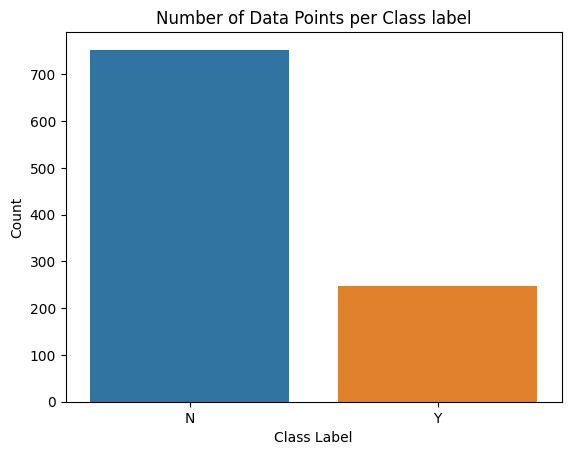

In [136]:
class_counts = df['fraud_reported'].value_counts()

plt.figure()
sns.barplot(x=class_counts.index,y=class_counts.values)
plt.title('Number of Data Points per Class label')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()

In [137]:
# Perform one-hot encoding on categorical features
#encoder = OneHotEncoder()
#X_encoded = encoder.fit_transform(X)

In [138]:
#X_encoded

In [139]:
X_encoded = pd.get_dummies(X)

In [140]:
X_encoded

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,...,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,ages_category_Young Adult,ages_category_Middle Aged,ages_category_Elderly,customer_category_New Client,customer_category_Established Client,customer_category_Long-Term Client
0,328,48,521585,1000,1406.91,0,466132,53300,0,5,...,False,False,False,False,False,True,False,False,False,True
1,228,42,342868,2000,1197.22,5000000,468176,0,0,8,...,False,False,False,False,False,True,False,False,False,True
2,134,29,687698,2000,1413.14,5000000,430632,35100,0,7,...,False,False,False,False,True,False,False,False,True,False
3,256,41,227811,2000,1415.74,6000000,608117,48900,-62400,5,...,False,False,False,False,False,True,False,False,False,True
4,228,44,367455,1000,1583.91,6000000,610706,66000,-46000,20,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1000,1310.80,0,431289,0,0,20,...,False,False,False,False,False,True,False,True,False,False
996,285,41,186934,1000,1436.79,0,608177,70900,0,23,...,False,False,False,False,False,True,False,False,False,True
997,130,34,918516,500,1383.49,3000000,442797,35100,0,4,...,False,False,False,False,False,True,False,False,True,False
998,458,62,533940,2000,1356.92,5000000,441714,0,0,2,...,False,False,False,False,False,False,True,False,False,True


In [219]:
reg_setup = setup(df_combined,target='fraud_reported',session_id=123)

,Description,Value
0,Session id,123
1,Target,fraud_reported
2,Target type,Binary
3,Target mapping,"N: 0, Y: 1"
4,Original data shape,"(1000, 1180)"
5,Transformed data shape,"(1000, 1180)"
6,Transformed train set shape,"(700, 1180)"
7,Transformed test set shape,"(300, 1180)"
8,Numeric features,27
9,Preprocess,True


In [220]:
best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [203]:
#best_model_params = best_model.get_params()

#print('Best Model Hyperparameters:')
#print(best_model_params)

AttributeError: 'list' object has no attribute 'get_params'

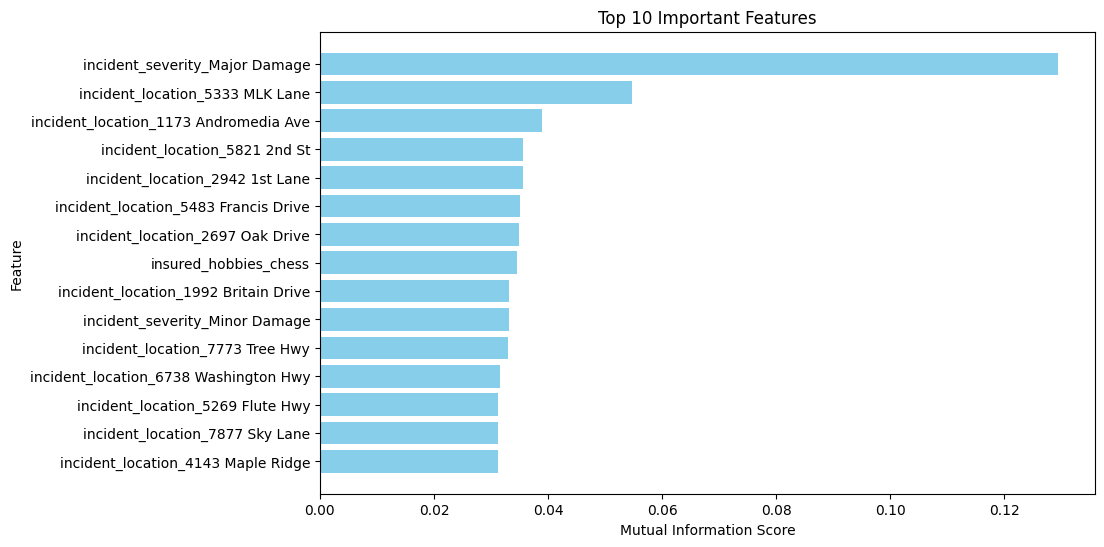

In [141]:
# Assuming X and y are your feature matrix and target vector respectively

# Convert the sparse matrix to a dense array
#X_dense = X_encoded.toarray()

mi_scores = mutual_info_classif(X_encoded, y)

# Assuming mi_scores contains the mutual information scores
mi_df = pd.DataFrame({'feature': X_encoded.columns, 'MI Score': mi_scores})

mi_df_sorted = mi_df.sort_values(by='MI Score', ascending=False)

top_features = mi_df_sorted.head(15)

plt.figure(figsize=(10, 6))
plt.barh(top_features['feature'], top_features['MI Score'], color='skyblue')
plt.xlabel('Mutual Information Score')
plt.ylabel('Feature')
plt.title('Top 10 Important Features')
plt.gca().invert_yaxis()
plt.show()

In [142]:
# Standardize the features

scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_encoded)
X_resampled = pd.DataFrame(X_resampled,columns=X_encoded.columns)

In [143]:
X_resampled

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,...,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,ages_category_Young Adult,ages_category_Middle Aged,ages_category_Elderly,customer_category_New Client,customer_category_Established Client,customer_category_Long-Term Client
0,1.078140,0.990921,-0.095953,-0.219541,0.614472,-0.480548,-0.489529,1.011331,0.953851,-0.956261,...,-0.153432,-0.209383,-0.153432,-0.127515,-0.493742,0.592749,-0.261488,-0.211972,-0.690728,0.759794
1,0.208995,0.333157,-0.791527,1.418826,-0.245646,1.697819,-0.461008,-0.901927,0.953851,-0.524475,...,-0.153432,-0.209383,-0.153432,-0.127515,-0.493742,0.592749,-0.261488,-0.211972,-0.690728,0.759794
2,-0.608002,-1.091998,0.550566,1.418826,0.640027,1.697819,-0.984885,0.358023,0.953851,-0.668404,...,-0.153432,-0.209383,-0.153432,-0.127515,2.025350,-1.687055,-0.261488,-0.211972,1.447748,-1.316146
3,0.452355,0.223530,-1.239334,1.418826,0.650692,2.133492,1.491682,0.853388,-1.267577,-0.956261,...,-0.153432,-0.209383,-0.153432,-0.127515,-0.493742,0.592749,-0.261488,-0.211972,-0.690728,0.759794
4,0.208995,0.552412,-0.695834,-0.219541,1.340501,2.133492,1.527808,1.467210,-0.683741,1.202666,...,-0.153432,-0.209383,-0.153432,-0.127515,-0.493742,0.592749,-0.261488,-0.211972,-0.690728,0.759794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.746582,-0.105352,1.539740,-0.219541,0.220243,-0.480548,-0.975717,-0.901927,0.953851,1.202666,...,-0.153432,-0.209383,-0.153432,-0.127515,-0.493742,0.592749,-0.261488,4.717607,-0.690728,-1.316146
996,0.704407,0.223530,-1.398429,-0.219541,0.737036,-0.480548,1.492519,1.643100,0.953851,1.634452,...,-0.153432,-0.209383,-0.153432,-0.127515,-0.493742,0.592749,-0.261488,-0.211972,-0.690728,0.759794
997,-0.642767,-0.543861,1.448920,-1.038725,0.518407,0.826472,-0.815138,0.358023,0.953851,-1.100189,...,-0.153432,-0.209383,-0.153432,-0.127515,-0.493742,0.592749,-0.261488,-0.211972,1.447748,-1.316146
998,2.208028,2.525704,-0.047867,1.418826,0.409421,1.697819,-0.830250,-0.901927,0.953851,-1.388046,...,-0.153432,-0.209383,-0.153432,-0.127515,-0.493742,-1.687055,3.824265,-0.211972,-0.690728,0.759794


In [144]:
X_resampled

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,...,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,ages_category_Young Adult,ages_category_Middle Aged,ages_category_Elderly,customer_category_New Client,customer_category_Established Client,customer_category_Long-Term Client
0,1.078140,0.990921,-0.095953,-0.219541,0.614472,-0.480548,-0.489529,1.011331,0.953851,-0.956261,...,-0.153432,-0.209383,-0.153432,-0.127515,-0.493742,0.592749,-0.261488,-0.211972,-0.690728,0.759794
1,0.208995,0.333157,-0.791527,1.418826,-0.245646,1.697819,-0.461008,-0.901927,0.953851,-0.524475,...,-0.153432,-0.209383,-0.153432,-0.127515,-0.493742,0.592749,-0.261488,-0.211972,-0.690728,0.759794
2,-0.608002,-1.091998,0.550566,1.418826,0.640027,1.697819,-0.984885,0.358023,0.953851,-0.668404,...,-0.153432,-0.209383,-0.153432,-0.127515,2.025350,-1.687055,-0.261488,-0.211972,1.447748,-1.316146
3,0.452355,0.223530,-1.239334,1.418826,0.650692,2.133492,1.491682,0.853388,-1.267577,-0.956261,...,-0.153432,-0.209383,-0.153432,-0.127515,-0.493742,0.592749,-0.261488,-0.211972,-0.690728,0.759794
4,0.208995,0.552412,-0.695834,-0.219541,1.340501,2.133492,1.527808,1.467210,-0.683741,1.202666,...,-0.153432,-0.209383,-0.153432,-0.127515,-0.493742,0.592749,-0.261488,-0.211972,-0.690728,0.759794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.746582,-0.105352,1.539740,-0.219541,0.220243,-0.480548,-0.975717,-0.901927,0.953851,1.202666,...,-0.153432,-0.209383,-0.153432,-0.127515,-0.493742,0.592749,-0.261488,4.717607,-0.690728,-1.316146
996,0.704407,0.223530,-1.398429,-0.219541,0.737036,-0.480548,1.492519,1.643100,0.953851,1.634452,...,-0.153432,-0.209383,-0.153432,-0.127515,-0.493742,0.592749,-0.261488,-0.211972,-0.690728,0.759794
997,-0.642767,-0.543861,1.448920,-1.038725,0.518407,0.826472,-0.815138,0.358023,0.953851,-1.100189,...,-0.153432,-0.209383,-0.153432,-0.127515,-0.493742,0.592749,-0.261488,-0.211972,1.447748,-1.316146
998,2.208028,2.525704,-0.047867,1.418826,0.409421,1.697819,-0.830250,-0.901927,0.953851,-1.388046,...,-0.153432,-0.209383,-0.153432,-0.127515,-0.493742,-1.687055,3.824265,-0.211972,-0.690728,0.759794


In [145]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y, test_size=0.2, random_state=1234)

In [146]:
# Apply SMOTE to oversample the minority class

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [147]:
y_train

,fraud_reported
281,Y
42,N
255,N
906,N
394,Y
...,...
204,N
53,N
294,Y
723,N


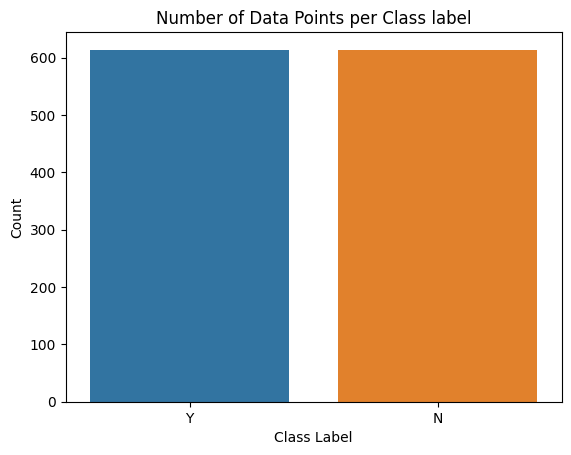

In [148]:
class_counts = y_train_resampled['fraud_reported'].value_counts()

plt.figure()
sns.barplot(x=class_counts.index,y=class_counts.values)
plt.title('Number of Data Points per Class label')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()

SUPPORT VECTOR MODEL

In [149]:
#Specify scorer

from sklearn.metrics import f1_score, make_scorer

f1_scorer = make_scorer(f1_score, average='weighted')

In [150]:
from sklearn.model_selection import GridSearchCV  #Bayesian Search - Hyperparameter
from sklearn.svm import SVC

svm_parameters = {'kernel':('linear','rbf', 'poly'), 
                  'C':(0.01,0.1)}
svm = SVC(random_state=1234)
svm_clf = GridSearchCV(svm, svm_parameters, cv=5, 
                       scoring=f1_scorer)
svm_clf.fit(X_train_resampled,y_train_resampled)
svm_clf.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [151]:
print('Best score:',svm_clf.best_score_)

Best score: 0.9763864017821264


DECISION TREE CLASSIFIER

In [152]:
from sklearn.tree import DecisionTreeClassifier

dt_parameters = {'max_depth':[None, 8, 10], 
                 'min_samples_leaf':[1,2,3]}
dt = DecisionTreeClassifier(random_state=1234)

dt_clf = GridSearchCV(dt, dt_parameters, cv=5)# 80/20 
dt_clf.fit(X_train_resampled,y_train_resampled)
dt_clf.best_params_

{'max_depth': None, 'min_samples_leaf': 1}

In [153]:
print('Best score:',dt_clf.best_score_)

Best score: 0.8698025551684088


LOGISTIC REGRESSION

In [154]:
from sklearn.linear_model import LogisticRegression

lg_clf = LogisticRegression(random_state=1234)
lg_clf.fit(X_train_resampled,y_train_resampled)

LogisticRegression(random_state=1234)

RANDOM FOREST 

In [155]:
from sklearn.ensemble import RandomForestClassifier

rf_parameters = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'max_depth': [10, 20],      # Maximum depth of the trees
    'min_samples_split': [2, 5],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2]     # Minimum number of samples required at each leaf node
}

rf = RandomForestClassifier(random_state=1234)

rf_clf = GridSearchCV(rf, rf_parameters, cv=5)# 80/20 
rf_clf.fit(X_train_resampled,y_train_resampled)
rf_clf.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [156]:
print('Best score:',rf_clf.best_score_)

Best score: 0.8747436535589845


In [157]:
# Build a classifier (Random Forest is used here as an example)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [158]:
# Evaluate the model

from sklearn.metrics import classification_report

y_predict_svm = svm_clf.predict(X_test)
y_predict_dt = dt_clf.predict(X_test)
y_predict_lg = lg_clf.predict(X_test)
y_predict_rf = rf_clf.predict(X_test)

report_svm = classification_report(y_test,
                                   y_predict_svm,
                                   output_dict=True)
report_dt = classification_report(y_test,
                                  y_predict_dt,
                                  output_dict=True)
report_lg = classification_report(y_test,
                                  y_predict_lg,
                                  output_dict=True)
report_rf = classification_report(y_test,
                                  y_predict_rf,
                                  output_dict=True)

print('SVM:\n', classification_report(y_test,y_predict_svm))
print('DT:\n', classification_report(y_test,y_predict_dt))
print('LG:\n', classification_report(y_test,y_predict_lg))
print('RF:\n', classification_report(y_test,y_predict_rf))

SVM:
               precision    recall  f1-score   support

           N       0.73      0.98      0.83       139
           Y       0.77      0.16      0.27        61

    accuracy                           0.73       200
   macro avg       0.75      0.57      0.55       200
weighted avg       0.74      0.73      0.66       200

DT:
               precision    recall  f1-score   support

           N       0.86      0.90      0.88       139
           Y       0.74      0.66      0.70        61

    accuracy                           0.82       200
   macro avg       0.80      0.78      0.79       200
weighted avg       0.82      0.82      0.82       200

LG:
               precision    recall  f1-score   support

           N       0.73      0.96      0.83       139
           Y       0.71      0.20      0.31        61

    accuracy                           0.73       200
   macro avg       0.72      0.58      0.57       200
weighted avg       0.72      0.73      0.67       200

RF:

<AxesSubplot: >

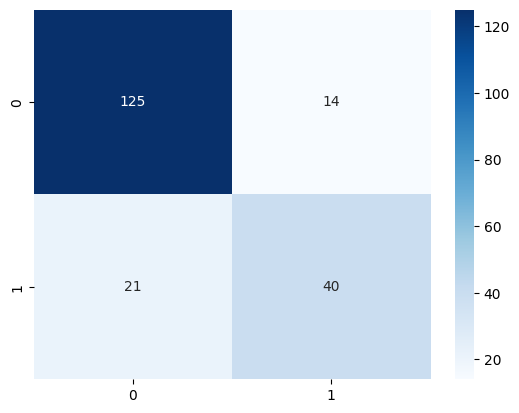

In [190]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict_dt)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

Based on the provided classification report for the Decision Tree (DT) model:

The model achieves relatively high precision for class 'N' (0.86), indicating that when it predicts an instance as 'N', it is correct about 86% of the time. However, the precision for class 'Y' (0.74) is slightly lower, suggesting that there might be some misclassification of instances predicted as 'Y'.

The recall for class 'N' is high (0.90), indicating that the model effectively captures a large proportion (90%) of actual instances of class 'N'. However, the recall for class 'Y' is relatively lower (0.66), indicating that the model misses a significant portion (34%) of actual instances of class 'Y'.

The F1-score for class 'N' is high (0.88), suggesting a good balance between precision and recall for this class. However, the F1-score for class 'Y' is lower (0.70), indicating a trade-off between precision and recall for this class.

The overall accuracy of the model is 0.82, which is relatively good. However, accuracy alone may not provide a complete picture, especially in imbalanced datasets.

The macro-averaged precision, recall, and F1-score are slightly lower than the weighted averages, indicating some imbalance in class distribution.

Overall, the model performs reasonably well, with high precision and recall for class 'N' but lower recall for class 'Y'. Depending on the specific context and requirements, further optimization or exploration may be needed, particularly to improve the model's performance on predicting instances of class 'Y'.

WRAPPER BASED METHODS 

SUPPORT VECTOR MODEL

In [172]:
from sklearn.feature_selection import SequentialFeatureSelector

In [173]:
svm_model = SVC(kernel=svm_clf.best_params_['kernel'],
                C=svm_clf.best_params_['C'],random_state=1234)
#create model in its best config (and not a Search routine)

svm_clf_sfs = SequentialFeatureSelector(svm_model, 
                                        scoring=f1_scorer,
                                        n_features_to_select='auto',
                                        tol=0.01,
                                        direction='backward')
svm_clf_sfs.fit(X_train_resampled, y_train_resampled)

SequentialFeatureSelector(direction='backward',
                          estimator=SVC(C=0.01, kernel='linear',
                                        random_state=1234),
                          n_features_to_select='auto',
                          scoring=make_scorer(f1_score, average=weighted),
                          tol=0.01)

In [174]:
svm_feats = X_resampled.columns[svm_clf_sfs.get_support()]
print('DT - Reduced Feature Size:', len(svm_feats),
                                  "/",len(X_resampled.columns))
svm_feats

DT - Reduced Feature Size: 1178 / 1179


Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       ...
       'auto_model_Ultima', 'auto_model_Wrangler', 'auto_model_X5',
       'auto_model_X6', 'ages_category_Young Adult',
       'ages_category_Middle Aged', 'ages_category_Elderly',
       'customer_category_New Client', 'customer_category_Established Client',
       'customer_category_Long-Term Client'],
      dtype='object', length=1178)

In [175]:
svm_model.fit(X_train_resampled.loc[:,svm_feats],y_train_resampled)
#retrain the model on smaller subset

SVC(C=0.01, kernel='linear', random_state=1234)

DECISION TREE CLASSIFIER

In [176]:
dt_model = DecisionTreeClassifier(max_depth=
                                  dt_clf.best_params_['max_depth'],
                                  min_samples_leaf=
                                  dt_clf.best_params_['min_samples_leaf'],
                            random_state=1234)

dt_clf_sfs = SequentialFeatureSelector(dt_model, 
                                       scoring=f1_scorer,
                                       n_features_to_select='auto',
                                       tol=0.01,
                                       direction='backward')
dt_clf_sfs.fit(X_train_resampled, y_train_resampled)

SequentialFeatureSelector(direction='backward',
                          estimator=DecisionTreeClassifier(random_state=1234),
                          n_features_to_select='auto',
                          scoring=make_scorer(f1_score, average=weighted),
                          tol=0.01)

In [177]:
dt_feats = X_resampled.columns[dt_clf_sfs.get_support()]
print('DT - Reduced Feature Size:', len(dt_feats),
                              "/",len(X_resampled.columns))
dt_feats

DT - Reduced Feature Size: 1178 / 1179


Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       ...
       'auto_model_Ultima', 'auto_model_Wrangler', 'auto_model_X5',
       'auto_model_X6', 'ages_category_Young Adult',
       'ages_category_Middle Aged', 'ages_category_Elderly',
       'customer_category_New Client', 'customer_category_Established Client',
       'customer_category_Long-Term Client'],
      dtype='object', length=1178)

In [178]:
dt_model.fit(X_train_resampled.loc[:,dt_feats],y_train_resampled)
#retrain the model on smaller subset

DecisionTreeClassifier(random_state=1234)

LOGISTIC REGRESSION

In [179]:
lg_model = LogisticRegression()

lg_model_sfs = SequentialFeatureSelector(lg_model, 
                                         scoring=f1_scorer, 
                                         tol=0.01,
                                         n_features_to_select='auto',
                                         direction='backward')
lg_model_sfs.fit(X_train_resampled, y_train_resampled)

SequentialFeatureSelector(direction='backward', estimator=LogisticRegression(),
                          n_features_to_select='auto',
                          scoring=make_scorer(f1_score, average=weighted),
                          tol=0.01)

In [180]:
lg_feats = X_resampled.columns[lg_model_sfs.get_support()]
print('LG - Reduced Feature Size:', len(lg_feats),"/",
                                      len(X_resampled.columns))
lg_feats

LG - Reduced Feature Size: 1178 / 1179


Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       ...
       'auto_model_Ultima', 'auto_model_Wrangler', 'auto_model_X5',
       'auto_model_X6', 'ages_category_Young Adult',
       'ages_category_Middle Aged', 'ages_category_Elderly',
       'customer_category_New Client', 'customer_category_Established Client',
       'customer_category_Long-Term Client'],
      dtype='object', length=1178)

In [181]:
lg_model = LogisticRegression()
lg_model.fit(X_train_resampled.loc[:,lg_feats],y_train_resampled)
#retrain the model on smaller subset

LogisticRegression()

RANDOM FOREST CLASSIFIER

In [182]:
rf_model = RandomForestClassifier(max_depth=
                                  rf_clf.best_params_['max_depth'],
                                  min_samples_leaf=
                                  rf_clf.best_params_['min_samples_leaf'],
                                  min_samples_split = rf_clf.best_params_['min_samples_split'],
                                  n_estimators = rf_clf.best_params_['n_estimators'],
                            random_state=1234)

rf_clf_sfs = SequentialFeatureSelector(rf_model, 
                                       scoring=f1_scorer, 
                                       tol=0.01,direction='backward',
                                      n_features_to_select = 1178)
rf_clf_sfs.fit(X_train_resampled, y_train_resampled)

SequentialFeatureSelector(direction='backward',
                          estimator=RandomForestClassifier(max_depth=10,
                                                           n_estimators=200,
                                                           random_state=1234),
                          n_features_to_select=1178,
                          scoring=make_scorer(f1_score, average=weighted),
                          tol=0.01)

In [183]:
rf_feats = X_resampled.columns[rf_clf_sfs.get_support()]
print('RF - Reduced Feature Size:', len(rf_feats),
                              "/",len(X_resampled.columns))
rf_feats

RF - Reduced Feature Size: 1178 / 1179


Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       ...
       'auto_model_Ultima', 'auto_model_Wrangler', 'auto_model_X5',
       'auto_model_X6', 'ages_category_Young Adult',
       'ages_category_Middle Aged', 'ages_category_Elderly',
       'customer_category_New Client', 'customer_category_Established Client',
       'customer_category_Long-Term Client'],
      dtype='object', length=1178)

In [184]:
rf_model.fit(X_train_resampled.loc[:,rf_feats],y_train_resampled)
#retrain the model on smaller subset

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=1234)

In [185]:
y_predict_svm_sfs = svm_model.predict(X_test.loc[:,svm_feats])
y_predict_dt_sfs = dt_model.predict(X_test.loc[:,dt_feats])
y_predict_lg_sfs = lg_model.predict(X_test.loc[:,lg_feats])
y_predict_rf_sfs = rf_model.predict(X_test.loc[:,rf_feats])

report_svm_sfs = classification_report(y_test,
                                       y_predict_svm_sfs,
                                       output_dict=True)
report_dt_sfs = classification_report(y_test,
                                      y_predict_dt_sfs,
                                      output_dict=True)
report_lg_sfs = classification_report(y_test,
                                      y_predict_lg_sfs,
                                      output_dict=True)
report_rf_sfs = classification_report(y_test,
                                      y_predict_rf_sfs,
                                      output_dict=True)

print('SVM - %d Feature(s):\n'%len(svm_feats), 
      classification_report(y_test,y_predict_svm_sfs))
print('DT - %d Feature(s):\n'%len(dt_feats), 
      classification_report(y_test,y_predict_dt_sfs))
print('LG - %d Feature(s):\n'%len(lg_feats), 
      classification_report(y_test,y_predict_lg_sfs))
print('RF - %d Feature(s):\n'%len(rf_feats), 
      classification_report(y_test,y_predict_rf_sfs))

SVM - 1178 Feature(s):
               precision    recall  f1-score   support

           N       0.71      0.99      0.83       139
           Y       0.83      0.08      0.15        61

    accuracy                           0.71       200
   macro avg       0.77      0.54      0.49       200
weighted avg       0.75      0.71      0.62       200

DT - 1178 Feature(s):
               precision    recall  f1-score   support

           N       0.86      0.90      0.88       139
           Y       0.74      0.66      0.70        61

    accuracy                           0.82       200
   macro avg       0.80      0.78      0.79       200
weighted avg       0.82      0.82      0.82       200

LG - 1178 Feature(s):
               precision    recall  f1-score   support

           N       0.72      0.99      0.84       139
           Y       0.89      0.13      0.23        61

    accuracy                           0.73       200
   macro avg       0.81      0.56      0.53       200
weig

Compare Model Performances with and without Wrapper-based FS on bar plots

In [186]:
f1_scores_sfs = [0]*4
f1_scores_sfs[0] = report_svm_sfs['weighted avg']['f1-score']
f1_scores_sfs[1] = report_dt_sfs['weighted avg']['f1-score']
f1_scores_sfs[2] = report_lg_sfs['weighted avg']['f1-score']
f1_scores_sfs[3] = report_rf_sfs['weighted avg']['f1-score']

f1_scores_orig= [0]*4
f1_scores_orig[0] = report_svm['weighted avg']['f1-score']
f1_scores_orig[1] = report_dt['weighted avg']['f1-score']
f1_scores_orig[2] = report_lg['weighted avg']['f1-score']
f1_scores_orig[3] = report_rf['weighted avg']['f1-score']

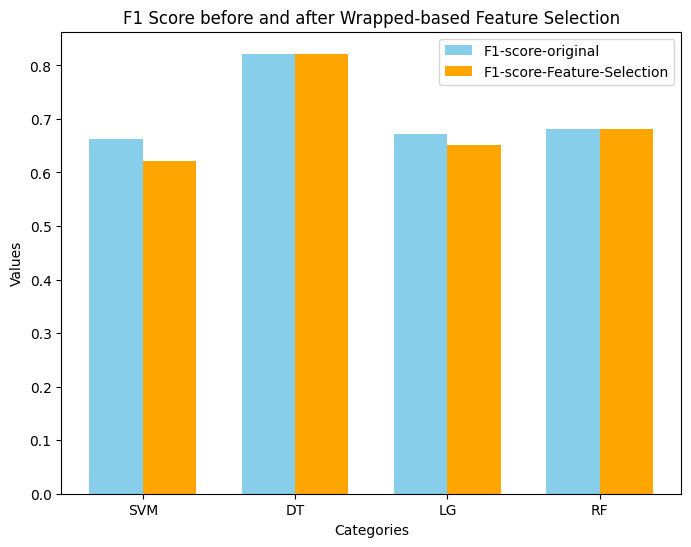

In [187]:
import numpy as np
import matplotlib.pyplot as plt

categories = ['SVM', 'DT', 'LG','RF']
values1 = f1_scores_orig  # First set of values
values2 = f1_scores_sfs  # Second set of values

# Define the width of the bars
bar_width = 0.35

# Set the positions for the bars
x = np.arange(len(categories))

# Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(x - bar_width/2, values1, width=bar_width, 
        label='F1-score-original', color='skyblue')
plt.bar(x + bar_width/2, values2, width=bar_width, 
        label='F1-score-Feature-Selection', color='orange')

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('F1 Score before and after Wrapped-based Feature Selection')
plt.xticks(x, categories)  # Set x-axis labels to category names
plt.legend()  # Add legend

# Display the plot
plt.show()

Confusion Matrix:
A confusion matrix visualizes the performance of a classification algorithm. It shows the number of True Positives, True Negatives, False Positives, and False Negatives.
You can use libraries like seaborn or matplotlib to create a heatmap of the confusion matrix.

<AxesSubplot: >

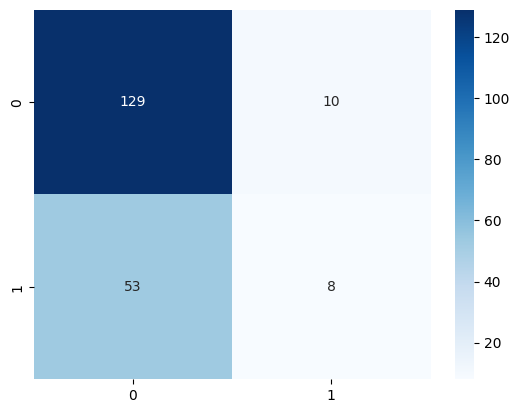

In [188]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

In [189]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

ValueError: y_true takes value in {'N', 'Y'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.